In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

In [2]:
training_df = pd.read_csv("train.csv")
testing_df = pd.read_csv("test.csv")
test_SalePrice = pd.read_csv("sample_submission.csv",dtype={col: np.float32 for col in ['Id', 'SalePrice']})

In [3]:
training_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


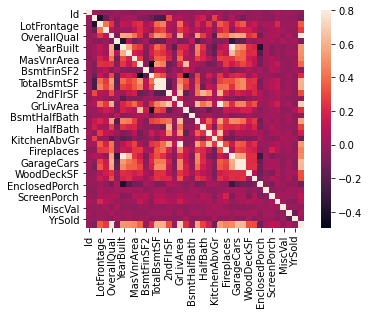

In [4]:
corrmat = training_df.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, vmax=0.8, square=True);

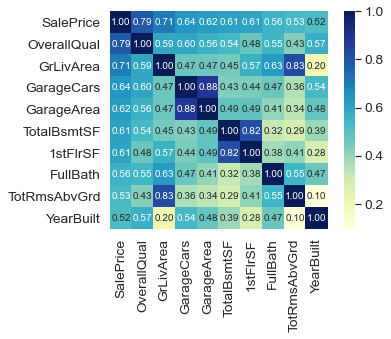

In [5]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(training_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap="YlGnBu", cbar=True, annot=True, square=True,fmt='.2f', annot_kws = {'size':10}, yticklabels=cols.values, xticklabels=cols.values);

In [6]:
total = training_df.isnull().sum().sort_values(ascending=False)
percent= (training_df.isnull().sum()/training_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis = 1, keys=['Total','Percent'])
missing_data[missing_data['Total']>0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [7]:
training_df = training_df.drop((missing_data[missing_data['Total']>4]).index,axis=1)
training_df = training_df.drop(training_df.loc[training_df['Electrical'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['MSZoning'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtFullBath'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtHalfBath'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['GarageArea'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtFinSF2'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['Exterior1st'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['TotalBsmtSF'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['GarageCars'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtUnfSF'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['BsmtFinSF1'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['KitchenQual'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['SaleType'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['Exterior2nd'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['Utilities'].isnull()].index)
training_df = training_df.drop(training_df.loc[training_df['Functional'].isnull()].index)
training_df.isnull().sum().max()
new_testing=pd.merge(testing_df,test_SalePrice, on='Id')

In [8]:
total = testing_df.isnull().sum().sort_values(ascending=False)
percent= (testing_df.isnull().sum()/testing_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis = 1, keys=['Total','Percent'])
missing_data[missing_data['Total']>0]

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [9]:
testing_df = testing_df.drop((missing_data[missing_data['Total']>4]).index,axis=1)
testing_df = testing_df.drop(testing_df.loc[testing_df['Electrical'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['MSZoning'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['BsmtFullBath'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['BsmtHalfBath'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['GarageArea'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['BsmtFinSF2'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['Exterior1st'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['TotalBsmtSF'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['GarageCars'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['BsmtUnfSF'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['BsmtFinSF1'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['KitchenQual'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['SaleType'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['Exterior2nd'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['Utilities'].isnull()].index)
testing_df = testing_df.drop(testing_df.loc[testing_df['Functional'].isnull()].index)
testing_df.isnull().sum().max()

0

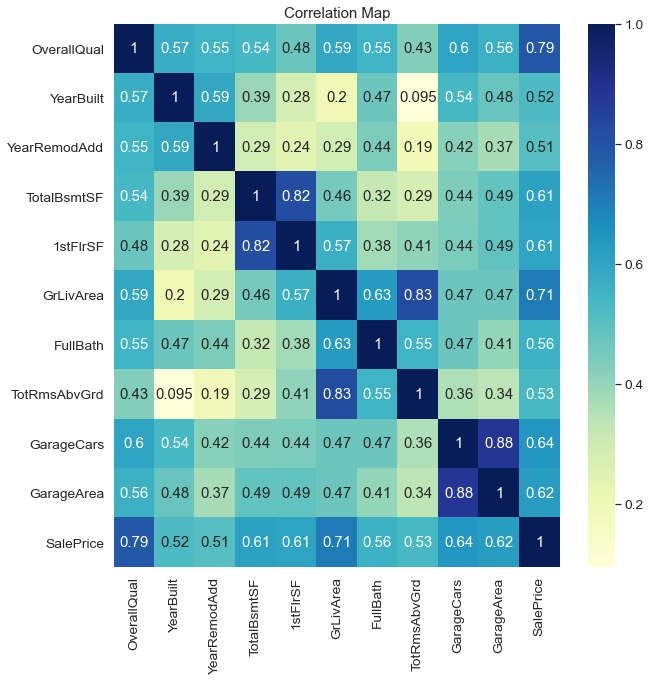

In [10]:
values = training_df.corr().SalePrice[training_df.corr().SalePrice>0.5]
columns = training_df.corr().SalePrice[training_df.corr().SalePrice>0.5].index.to_list()

corr2 = training_df[columns].corr()
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(corr2,cmap="YlGnBu", annot=True);
plt.title('Correlation Map')
plt.savefig('corr_map.png',bbox_inches="tight")

In [11]:
#features with corr > 0.5
columns

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [12]:
#dropping missing values from desired features
new_testing[columns].dropna()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,5,1961,1961,882.0,896,896,1,5,1.0,730.0,169277.046875
1,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0,187758.390625
2,5,1997,1998,928.0,928,1629,2,6,2.0,482.0,183583.687500
3,6,1998,1998,926.0,926,1604,2,7,2.0,470.0,179317.484375
4,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0,150730.078125
...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,546.0,546,1092,1,5,0.0,0.0,167081.218750
1455,4,1970,1970,546.0,546,1092,1,6,1.0,286.0,164788.781250
1456,5,1960,1996,1224.0,1224,1224,1,7,2.0,576.0,219222.421875
1457,5,1992,1992,912.0,970,970,1,6,0.0,0.0,184924.281250


In [13]:
X = training_df[columns[:-1]].iloc[:,0:].values
y = training_df.iloc[:, -1].values
X2 = new_testing[columns].dropna().drop(columns=['SalePrice'])
X2 = X2[columns[:-1]].iloc[:,0:].values
y2 = new_testing[columns].dropna()[['SalePrice']]
y2 = y2.round().iloc[:, -1].values


In [14]:
#varifying there are no missing values
df_temp = pd.DataFrame(X2)
df_temp.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape,y_train.shape)

(1313, 10) (1313,)


In [16]:
test_SalePrice.max()

Id             2919.00000
SalePrice    281643.96875
dtype: float32

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X2.shape)
print(y2.shape)

(1313, 10)
(1313,)
(1457, 10)
(1457,)


In [19]:
rf = RandomForestRegressor(n_estimators = 150)
rf = rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))
print(mean_squared_error(y_test,rf.predict(X_test)))
#print(rf.score(X2,y2))

0.9789568996940576
0.8706901445373214
721866891.5719353


In [27]:
pickle.dump(rf,open('rf_model.pkl','wb'))

In [20]:
rf.predict(X2[[1]])[0]

145835.66666666666

In [79]:
y_predictor = rf.predict(X_test)

plt.figure()
plt.plot(y_test, color='blue', label ='Real Value')
plt.plot(y_predictor, color='red', label='Prediction');
plt.title('Random Forest Model')
plt.savefig('rfprediction.png')

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

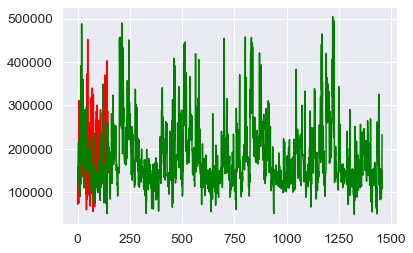

In [21]:
y_predictor = rf.predict(X2)

plt.figure()
plt.plot(y_test, color='red')
plt.plot(y_predictor, color='green');

In [22]:
training_df[columns[:-1]].columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')

In [26]:
importances = rf.feature_importances_
print("feature_importances")
sorted(zip(rf.feature_importances_,training_df[columns[:-1]].columns),reverse=True)

feature_importances


[(0.5836695793332167, 'OverallQual'),
 (0.13551082873214548, 'GrLivArea'),
 (0.07910689057710583, 'TotalBsmtSF'),
 (0.04608776087072542, '1stFlrSF'),
 (0.036086293011390505, 'GarageArea'),
 (0.028964177530289542, 'YearRemodAdd'),
 (0.02725826657177425, 'YearBuilt'),
 (0.025105478183888013, 'GarageCars'),
 (0.02358498293885863, 'TotRmsAbvGrd'),
 (0.014625742250605525, 'FullBath')]

In [26]:
from pprint import pprint

In [27]:
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [29]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [30]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,
    param_distributions  = random_grid, n_iter = 100, cv = 3,
    verbose = 2, random_state = 42, n_jobs = -1)
#rf_random.fit(X_train, columns[0:10])
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [31]:
rf_random.best_params_

{'n_estimators': 311,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [32]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100* np.mean( errors / y_test)
    accuracy = 100-mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10,
                                  random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 18979.9580 degrees.
Accuracy = 88.73%.


In [33]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test,y_test)
print(base_model.score(X_train,y_train))
print(base_model.score(X_test,y_test))
print(mean_squared_error(y_test,base_model.predict(X_test)))

Model Performance
Average Error: 17552.0319 degrees.
Accuracy = 89.24%.
0.9765819160496616
0.8493623347617836
840928502.8591628


In [34]:
print('Improvement of {:0.2f}%.'.format(100*(random_accuracy -base_accuracy)/base_accuracy))

Improvement of 0.57%.


In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap':[True],
    'max_depth':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
    'max_features':[2,3],
    'min_samples_leaf':[3,4,5],
    'min_samples_split':[2,3,4,8,10, 12],
    'n_estimators':[100, 200, 300, 400]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose=2)

In [36]:
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 5184 out of 5184 | elapsed: 14.6min finished


{'bootstrap': True,
 'max_depth': 40,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [40]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid,X_test, y_test)
print(grid_search.score(X_train,y_train))
print(grid_search.score(X_test,y_test))
print(mean_squared_error(y_test,grid_search.predict(X_test)))

Model Performance
Average Error: 17560.4117 degrees.
Accuracy = 89.25%.
0.9111913463093392
0.879760870618197
671229940.3753428


In [38]:
print('Improvement of {:0.2f}%.'.format(100*(grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.59%.


In [41]:
best_grid

RandomForestRegressor(max_depth=40, max_features=3, min_samples_leaf=4)

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap':[True],
    'max_depth':[5,10,20,35,45],
    'max_features':[3],
    'min_samples_leaf':[4],
    'min_samples_split':[2, 3, 4],
    'n_estimators':[90, 100, 110, 120]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose=2)

In [43]:
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   10.1s finished


{'bootstrap': True,
 'max_depth': 35,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 120}

In [44]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid,X_test, y_test)
print(grid_search.score(X_train,y_train))
print(grid_search.score(X_test,y_test))
print(mean_squared_error(y_test,grid_search.predict(X_test)))

Model Performance
Average Error: 17697.8660 degrees.
Accuracy = 89.08%.
0.9073251706866124
0.8769016693164742
687191312.7600542


In [45]:
print('Improvement of {:0.2f}%.'.format(100*(grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.39%.


In [46]:
best_grid

RandomForestRegressor(max_depth=35, max_features=3, min_samples_leaf=4,
                      min_samples_split=4, n_estimators=120)

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap':[True],
    'max_depth':[10,20, 30,35,43],
    'max_features':[3,4],
    'min_samples_leaf':[3,4,5],
    'min_samples_split':[3,4,5],
    'n_estimators':[110, 120, 130]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose=2)

In [48]:
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  1.0min finished


{'bootstrap': True,
 'max_depth': 35,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 130}

In [49]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid,X_test, y_test)
print(grid_search.score(X_train,y_train))
print(grid_search.score(X_test,y_test))
print(mean_squared_error(y_test,grid_search.predict(X_test)))

Model Performance
Average Error: 17745.9849 degrees.
Accuracy = 89.10%.
0.9008244167831103
0.8780448355336286
680809634.8842682


In [50]:
print('Improvement of {:0.2f}%.'.format(100*(grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.41%.


In [51]:
best_grid

RandomForestRegressor(max_depth=35, max_features=4, min_samples_leaf=5,
                      min_samples_split=3, n_estimators=130)

In [69]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap':[True],
    'max_depth':[30, 35, 40],
    'max_features':[3,4,5],
    'min_samples_leaf':[4,5,6],
    'min_samples_split':[2,3,4],
    'n_estimators':[115, 130, 145]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose=2)

In [70]:
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:   58.3s finished


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 3,
 'n_estimators': 115}

In [71]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid,X_test, y_test)
print(grid_search.score(X_train,y_train))
print(grid_search.score(X_test,y_test))
print(mean_squared_error(y_test,grid_search.predict(X_test)))

Model Performance
Average Error: 17712.6572 degrees.
Accuracy = 89.19%.
0.8937262444625776
0.8782670320323681
679569232.1687179


In [72]:
print('Improvement of {:0.2f}%.'.format(100*(grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.51%.


In [73]:
best_grid

RandomForestRegressor(max_depth=30, max_features=5, min_samples_leaf=6,
                      min_samples_split=3, n_estimators=115)

In [74]:
pickle.dump(best_grid,open('rf_model_cv.pkl','wb'))

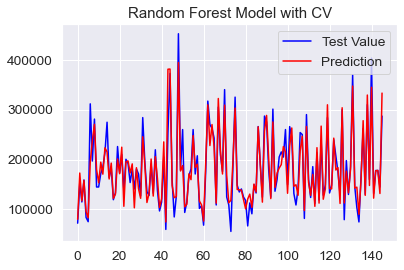

In [80]:
y_predictor = best_grid.predict(X_test)

plt.figure()
plt.plot(y_test, color='blue',label='Test Value')
plt.plot(y_predictor, color='red',label='Prediction');
plt.title('Random Forest Model with CV')
plt.legend()
plt.savefig('rfpredictionCV.png')